# 1NN против RandomForest

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.manifold import TSNE
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


В этом задании будет использоваться датасет digits из sklearn.datasets. Оставьте последние 25% объектов для контроля качества, разделив X и y на X_train, y_train и X_test, y_test.

In [2]:
digits = load_digits()
X = digits.data
y = digits.target
threshold = int(0.75 * len(X))
X_train, X_test = np.split(X, [threshold])
y_train, y_test = np.split(y, [threshold])

In [3]:
def print_to_file(value, filename):  
    print(value)
    with open(filename, "w") as file:
        file.write(str(value))

In [4]:
def plot_tsne(X_test, y_test, y_prob):
    tsne = TSNE()
    X_embedded = tsne.fit_transform(X_test)
    fig, ax = plt.subplots(1,2)
    sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_test, ax=ax[0]).set_title('y_test')
    sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_prob, ax=ax[1]).set_title('y_prob')
    fig.show()

Целью задания будет реализовать самый простой метрический классификатор — метод ближайшего соседа, а также сравнить качество работы реализованного вами 1NN с RandomForestClassifier из sklearn на 1000 деревьях.

## Задание 1

Реализуйте самостоятельно метод одного ближайшего соседа с евклидовой метрикой для задачи классификации. Можно не извлекать корень из суммы квадратов отклонений, т.к. корень — монотонное преобразование и не влияет на результат работы алгоритма.

Никакой дополнительной работы с признаками в этом задании делать не нужно — мы еще успеем этим заняться в других курсах. Ваша реализация может быть устроена следующим образом: можно для каждого классифицируемого объекта составлять список пар (расстояние до точки из обучающей выборки, метка класса в этой точке), затем сортировать этот список (по умолчанию сортировка будет сначала по первому элементу пары, затем по второму), а затем брать первый элемент (с наименьшим расстоянием).

Сортировка массива длиной N требует порядка N log N сравнений (строже говоря, она работает за O(N log N)). Подумайте, как можно легко улучшить получившееся время работы. Кроме простого способа найти ближайший объект всего за N сравнений, можно попробовать придумать, как разбить пространство признаков на части и сделать структуру данных, которая позволит быстро искать соседей каждой точки. За выбор метода поиска ближайших соседей в KNeighborsClassifier из sklearn отвечает параметр algorithm — если у вас уже есть некоторый бэкграунд в алгоритмах и структурах данных, вам может быть интересно познакомиться со структурами данных ball tree и kd tree.

Доля ошибок, допускаемых 1NN на тестовой выборке, — ответ в задании 1.

In [5]:
def get_dist(a, b):
    return np.linalg.norm(a-b)

class KNN():
    def __init__(self, k):
        self.k = k

    def fit(self, X_train: np.array, y_train:np.array):
        self.X_train = X_train
        self.y_train = y_train
        return self

    def predict(self, X_test: np.array): 
        y_pred = []
        for x_test in X_test:
            dists = []
            for x_train in self.X_train:
                dists.append(get_dist(x_train, x_test))
            dists = np.array(list(zip(dists, self.y_train)))
            dists = dists[dists[:,0].argsort()]
            dists = dists[:self.k]
            y_pred.append(Counter(dists[:,1]).most_common(1)[0][0])
        return y_pred

In [6]:
knn = KNN(1)
knn.fit(X_train, y_train)
y_prob = knn.predict(X_test)
accuracy = 1 - accuracy_score(y_test, y_prob)
print_to_file(accuracy, '1.txt')

0.0377777777777778


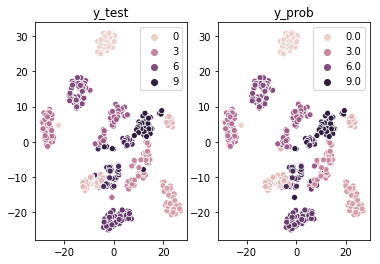

In [7]:
plot_tsne(X_test, y_test, y_prob)

## Задание 2

Теперь обучите на обучающей выборке RandomForestClassifier(n_estimators=1000) из sklearn. Сделайте прогнозы на тестовой выборке и оцените долю ошибок классификации на ней. Эта доля — ответ в задании 2. Обратите внимание на то, как соотносится качество работы случайного леса с качеством работы, пожалуй, одного из самых простых методов — 1NN. Такое различие — особенность данного датасета, но нужно всегда помнить, что такая ситуация тоже может иметь место, и не забывать про простые методы.

In [8]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(n_estimators=1000)
tree.fit(X_train, y_train)
y_prob = tree.predict(X_test)
accuracy = 1 - accuracy_score(y_test, y_prob)
print_to_file(accuracy, '2.txt')

0.06444444444444442


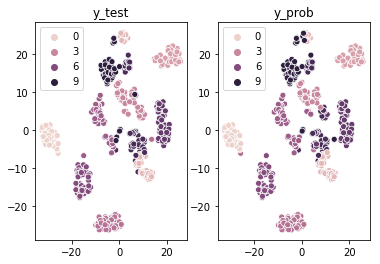

In [9]:
plot_tsne(X_test, y_test, y_prob)